In [1]:
import cv2
import os
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [2]:
image_folder = "./../data/images"
label_folder = "./../data/labels"

In [3]:
new_height = 1280
new_width = 640

In [4]:
def get_label_dict(label):

    label_dict = []

    for line in label:
        line = line.replace("\n", "").split(",")
        coords = line[:8]
        
        coords = [int(coord) for coord in coords]
        label = "".join(line[8:])

        coords_x = [x for idx, x in enumerate(coords) if idx%2==0]
        coords_y = [y for idx, y in enumerate(coords) if idx%2!=0]

        label_dict += [{"label": label, "x": coords_x, "y": coords_y}]
    
    return label_dict
        

In [5]:
for image in os.listdir(image_folder):
    image_ = cv2.imread(os.path.join(image_folder ,image))
    label = open(os.path.join(label_folder, f"{image[:-4]}.txt")).readlines()
    label_dict = get_label_dict(label)
    break

In [6]:
img = cv2.resize(image_, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

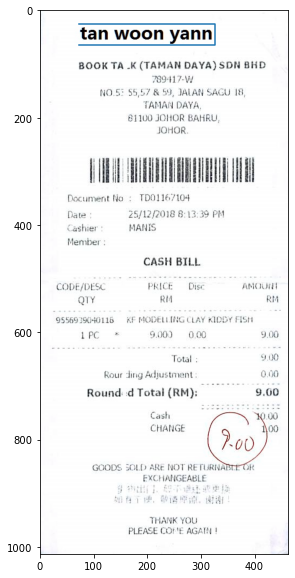

In [7]:
plt.figure(figsize = (10, 10))
plt.imshow(image_)
plt.plot(label_dict[0]['x'], label_dict[0]['y'])

In [8]:
old_h, old_w, _=image_.shape

In [9]:
new_x = np.array(label_dict[0]['x'])*(new_width/old_w)
new_y = np.array(label_dict[0]['y'])*(new_height/old_h)

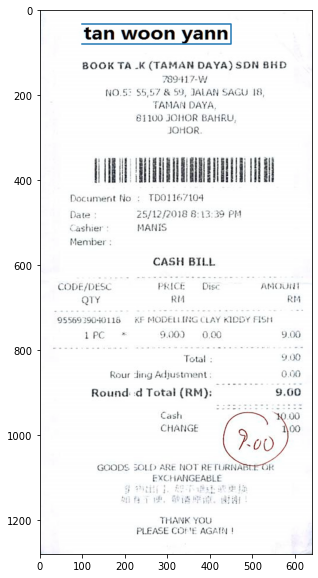

In [10]:
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.plot(new_x.astype(int), new_y.astype(int))

In [129]:
def scale_image_and_bnd_boxes(image, label_dict, new_height, new_width):

    old_height, old_width , _ = image.shape

    if old_height > new_height:
        interpolation = cv2.INTER_AREA
    else:
        interpolation = cv2.INTER_CUBIC

    new_image = cv2.resize(image, (new_width, new_height), interpolation=interpolation)

    scale_X = new_width/old_width
    scale_Y = new_height/old_height

    for label in label_dict:
        label["x"] = (np.array(label['x'])*scale_X).astype(int)
        label["y"] = (np.array(label['y'])*scale_Y).astype(int)

    return new_image, label_dict


def adjust_bounding_box(label_dict, x1, y1, x_buffer, y_buffer):

    for label in label_dict:
        label["x"] = list(np.array(label['x']) - x1+x_buffer)
        label['y'] = list(np.array(label['y']) - y1+y_buffer)

    return label_dict


def reshape_large_images(image, label_dict):

    x_bnd = []
    y_bnd = []

    for label in label_dict:
        x_bnd += label['x']
        y_bnd += label['y']

    #find bounding box for the reciept
    xmax = np.max(x_bnd).item()
    ymax = np.max(y_bnd).item()
    xmin = np.min(x_bnd).item()
    ymin = np.min(y_bnd).item()

    #extra buffer whicle cropping.
    x_buffer = 70
    y_buffer = 20

    label_dict = adjust_bounding_box(label_dict, xmin, ymin, x_buffer, y_buffer)
    new_image = image[ymin-y_buffer:ymax+y_buffer, xmin-x_buffer:xmax+x_buffer]

    return label_dict, new_image


In [133]:
for i, image in enumerate(os.listdir(image_folder)):
    image_ = cv2.imread(os.path.join(image_folder ,image))
    label = open(os.path.join(label_folder, f"{image[:-4]}.txt")).readlines()
    # label_dict = get_label_dict(label)
    
    h, w, _ = image_.shape
    label_dict = get_label_dict(label)

    if h>w and h<2500:
        image_, label_dict = scale_image_and_bnd_boxes(image_, label_dict, new_height, new_width)

    else:
        print("ok")
        label_dict, image_ = reshape_large_images(image_, label_dict)
    
        image_, label_dict = scale_image_and_bnd_boxes(image_, label_dict, new_height, new_width)

        break
    

ok


- LION FILE 220*307 LAMINATING FILM


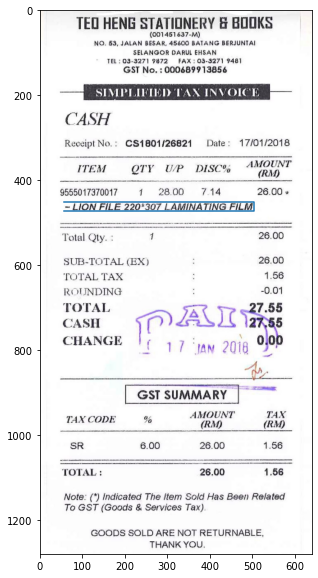

In [134]:
idx = 20

print(label_dict[idx]['label'])
plt.figure(figsize = (10, 10))
plt.imshow(image_)
plt.plot(label_dict[idx]['x'], label_dict[idx]['y'])

In [106]:
x_bnd = []
y_bnd = []

for label in label_dict:
    x_bnd += label['x']
    y_bnd += label['y']

x2 = np.max(x_bnd)
y2 = np.max(y_bnd)
x1 = np.min(x_bnd)
y1 = np.min(y_bnd)


In [122]:
type(x1)

numpy.int32

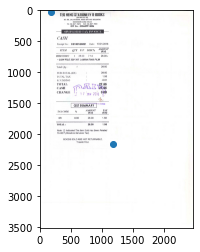

In [107]:
plt.imshow(image_)
x_buffer = 70
y_buffer = 20
plt.scatter([x1-x_buffer, x2+x_buffer], [y1-y_buffer, y2+y_buffer])

In [112]:
new_label_dict = []

for label in label_dict:
    new_label = {}
    new_label["x"] = list(np.array(label['x']) - x1+x_buffer)
    new_label['y'] = list(np.array(label['y']) - y1+y_buffer)

    new_label_dict += [new_label]


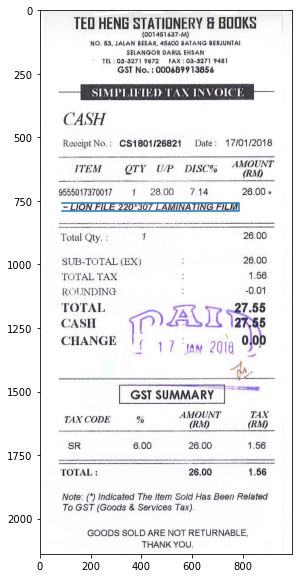

In [115]:
idx = 20

# print(label_dict[idx]['label'])
plt.figure(figsize = (10, 10))
plt.imshow(image_[y1-y_buffer:y2+y_buffer, x1-x_buffer:x2+x_buffer])
plt.plot(new_label_dict[idx]['x'], new_label_dict[idx]['y'])

In [135]:
for i, image in enumerate(os.listdir(image_folder)):
    image_ = cv2.imread(os.path.join(image_folder ,image))
    label = open(os.path.join(label_folder, f"{image[:-4]}.txt")).readlines()

        break


In [136]:
image_

array([[[119, 117, 117],
        [133, 131, 131],
        [130, 128, 128],
        ...,
        [204, 204, 204],
        [172, 172, 172],
        [173, 173, 173]],

       [[ 33,  31,  31],
        [ 48,  46,  46],
        [ 47,  45,  45],
        ...,
        [135, 135, 135],
        [113, 113, 113],
        [118, 118, 118]],

       [[ 25,  23,  23],
        [ 43,  41,  41],
        [ 46,  44,  44],
        ...,
        [136, 136, 136],
        [127, 127, 127],
        [121, 121, 121]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [220, 220, 220],
        [219, 219, 219],
        [218, 218, 218]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [224, 224, 224],
        [222, 222, 222],
        [222, 222, 222]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 232, 232],
        [231, 231, 231],
        [231, 231, 231]]